In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('train_titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [46]:
X=df.drop(columns=['Name','Ticket','Cabin','Survived'])
X['Age']=X['Age'].fillna(X['Age'].mean())
X['Fare']=X['Fare'].mean()
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,32.204208,2
1,2,1,0,38.000000,1,0,32.204208,0
2,3,3,0,26.000000,0,0,32.204208,2
3,4,1,0,35.000000,1,0,32.204208,2
4,5,3,1,35.000000,0,0,32.204208,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,32.204208,2
887,888,1,0,19.000000,0,0,32.204208,2
888,889,3,0,29.699118,1,2,32.204208,2
889,890,1,1,26.000000,0,0,32.204208,0


In [47]:
Y=df['Survived']

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)
#Linear Regresssion model
model1=LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [65]:
ypred=model1.predict(xtest)
from sklearn.metrics import accuracy_score

In [66]:
ypred_binary = (np.array(ypred) >= 0.5).astype(int)

# Now safely compute accuracy
accuracy = accuracy_score(ytest, ypred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7686567164179104


In [67]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [68]:
ypred=model2.predict(xtest)
ypred_binary = (np.array(ypred) >= 0.5).astype(int)
accuracy = accuracy_score(ytest, ypred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.5298507462686567


In [69]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model3=BernoulliNB()
model3.fit(xtrain,ytrain)

BernoulliNB()

In [70]:
ypred=model3.predict(xtest)
ypred_binary = (np.array(ypred) >= 0.5).astype(int)
accuracy = accuracy_score(ytest, ypred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7574626865671642


In [71]:
from sklearn.naive_bayes import MultinomialNB
model4=MultinomialNB()
model4.fit(xtrain,ytrain)

MultinomialNB()

In [72]:
ypred=model4.predict(xtest)
ypred_binary = (np.array(ypred) >= 0.5).astype(int)
accuracy = accuracy_score(ytest, ypred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.5261194029850746


In [73]:
#Decision Tree
from sklearn import tree
model5=tree.DecisionTreeClassifier()
model5.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
ypred=model5.predict(xtest)
ypred_binary = (np.array(ypred) >= 0.5).astype(int)
accuracy = accuracy_score(ytest, ypred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7052238805970149


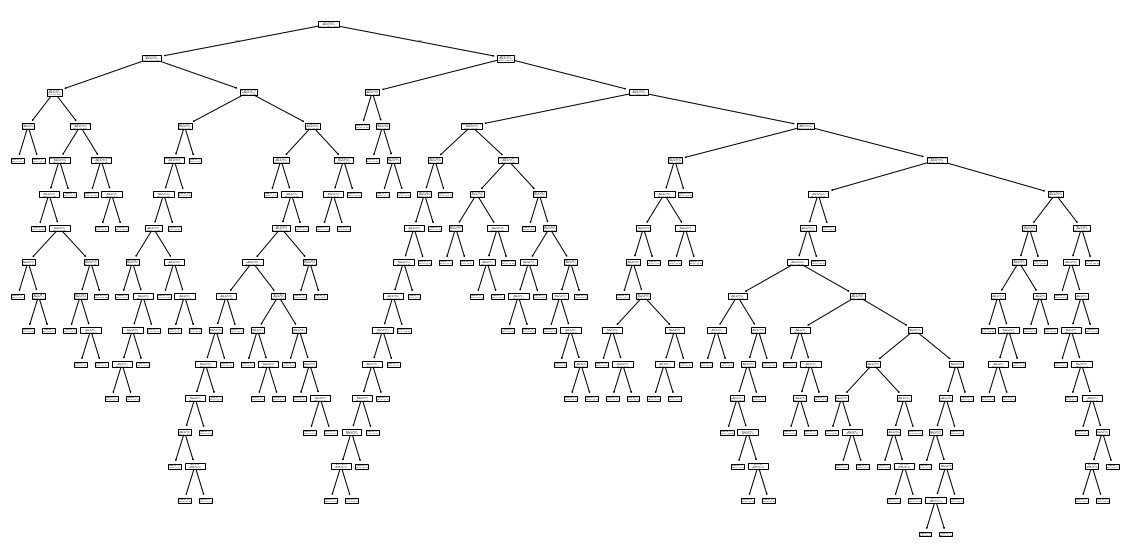

In [80]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model5, feature_names=xtrain.columns)
plt.show()

In [75]:
#Support vector Machine
from sklearn.svm import SVC
svm=SVC(C=1)

In [76]:
svm.fit(xtrain,ytrain)

SVC(C=1)

In [77]:
ypred=svm.predict(xtest)
ypred_binary = (np.array(ypred) >= 0.5).astype(int)
accuracy = accuracy_score(ytest, ypred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.5708955223880597


In [81]:
#Kmeans Clustring
from sklearn.cluster import KMeans

In [82]:
kmeans = KMeans(n_clusters=2, random_state=42)


In [83]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [84]:
X['Cluster'] = kmeans.labels_

In [86]:
pd.crosstab(df['Survived'], X['Cluster'])

Cluster,0,1
Survived,,
0,271,278
1,175,167
